In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(style = "ticks")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
from matplotlib.colors import LogNorm
from scipy import stats

In [3]:
dataset = pd.read_csv('who_suicide_statistics.csv')
dataset.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [165]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [166]:
dataset.dropna(inplace = True)
dataset.shape

(36060, 6)

In [167]:
dataset.shape
dataset.age.value_counts()

5-14 years     6010
25-34 years    6010
15-24 years    6010
55-74 years    6010
75+ years      6010
35-54 years    6010
Name: age, dtype: int64

In [168]:
dataset.suicides_no.mean()

221.8099556295064

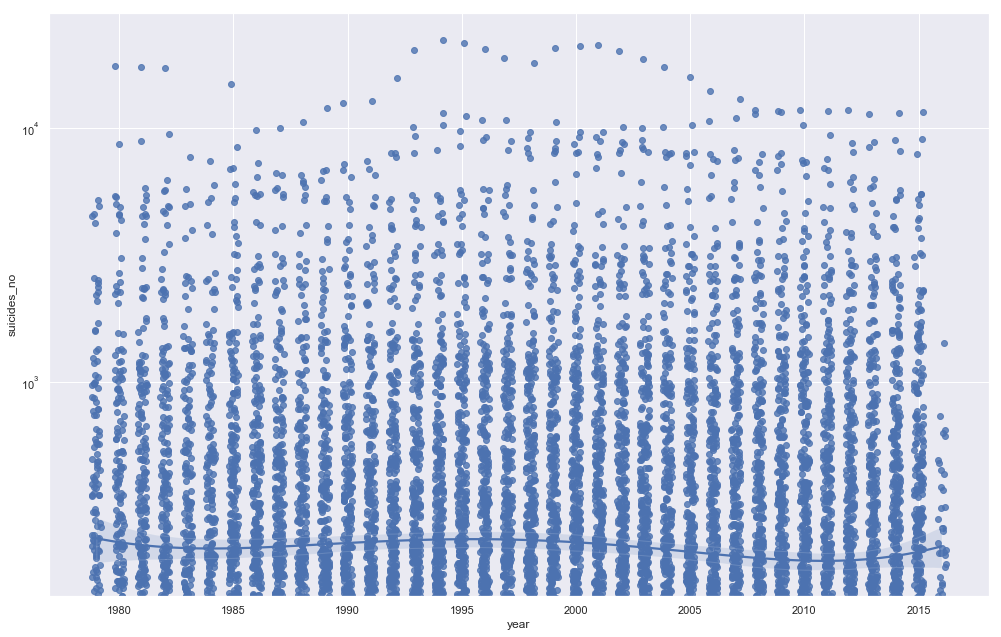

In [169]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.regplot(x = dataset.year , y = dataset.suicides_no , x_jitter = 0.2 , order = 4)
plt.yscale('log')
plt.show()

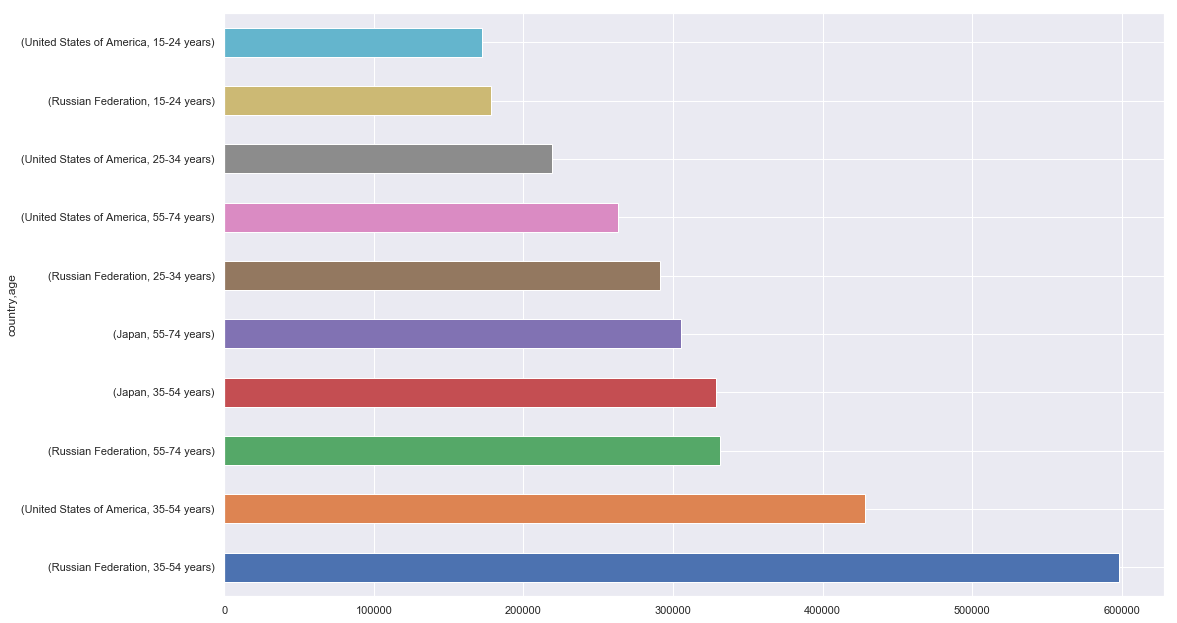

In [170]:
dataset.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind = 'barh')

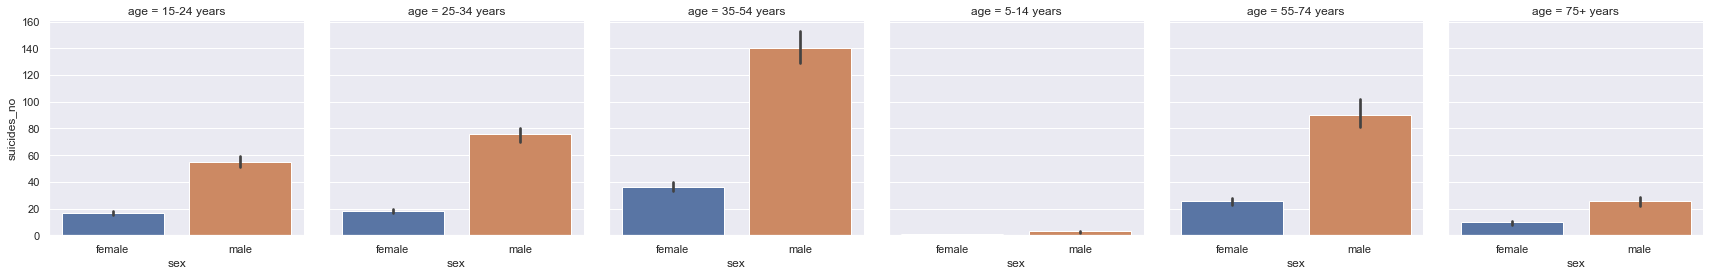

In [171]:
sns.catplot(x = 'sex' , y = 'suicides_no',data = dataset,col = 'age',kind = 'bar' , estimator = np.median , height= 4)
plt.show()

In [172]:
dx = dataset.groupby(['age','sex']).agg({'suicides_no': np.sum}).unstack()
dx

suicides_no           
sex              female       male
age                               
15-24 years    218309.0   757391.0
25-34 years    256427.0  1104353.0
35-54 years    607420.0  2280320.0
5-14 years      20152.0    42168.0
55-74 years    528359.0  1426791.0
75+ years      263627.0   493150.0

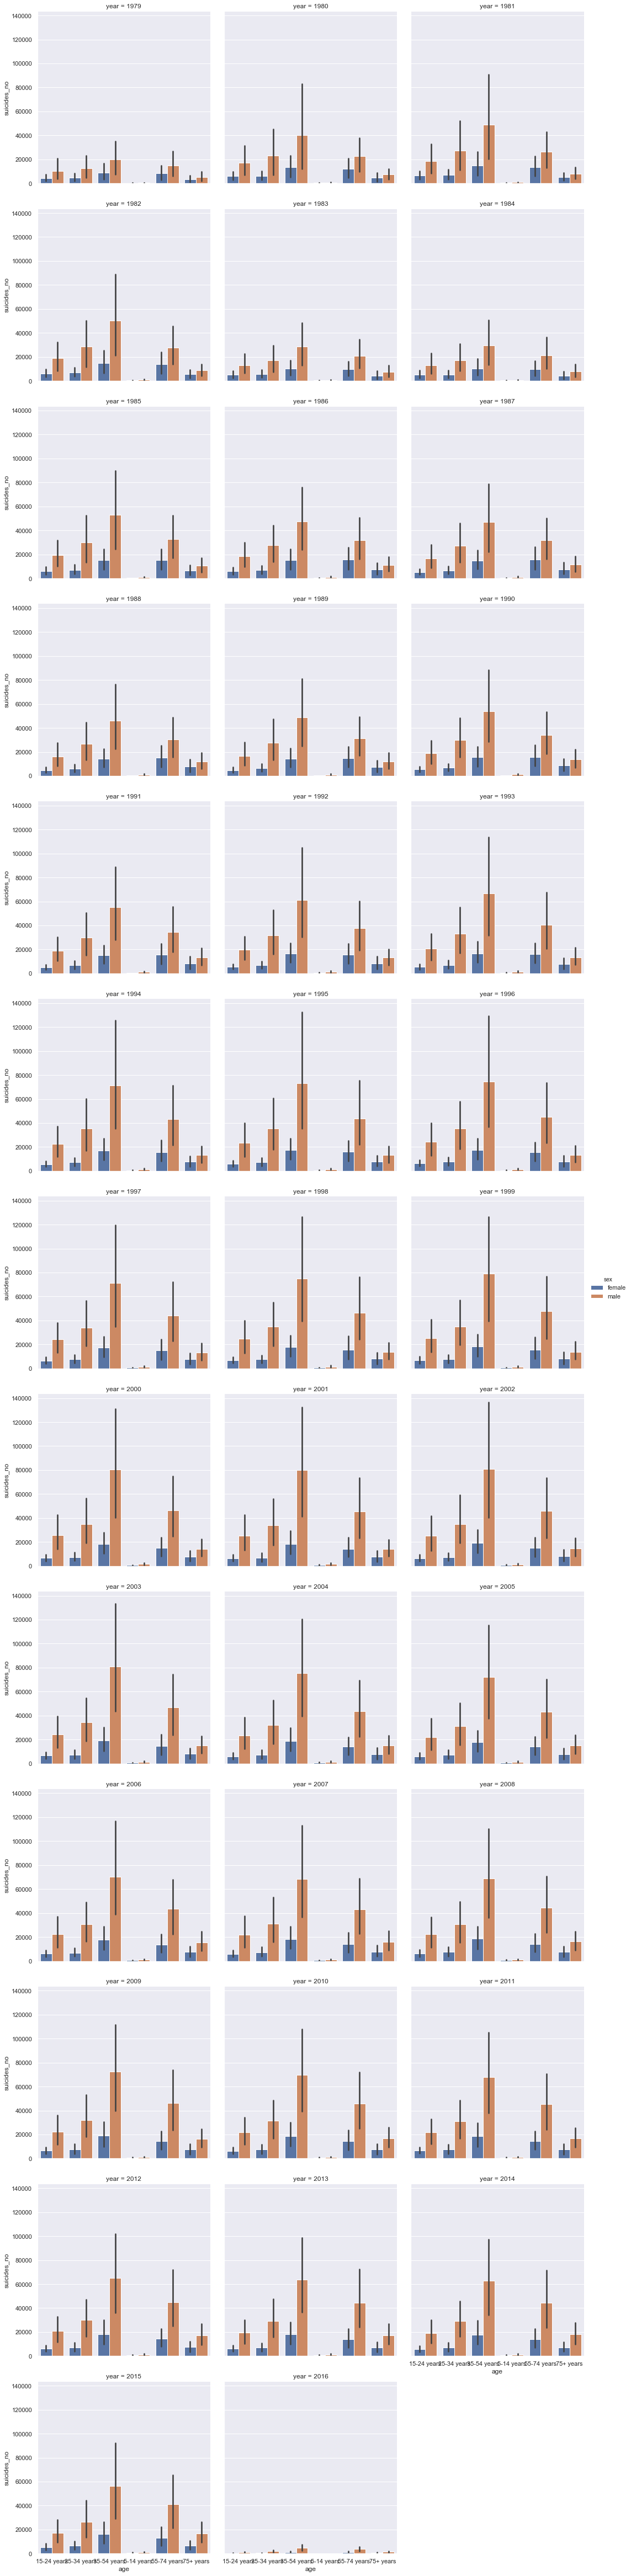

In [173]:
pp =sns.catplot(x = 'age',y = 'suicides_no',hue = 'sex',col = 'year',data = dataset , col_wrap = 3 , estimator = sum,kind = 'bar')
plt.show()

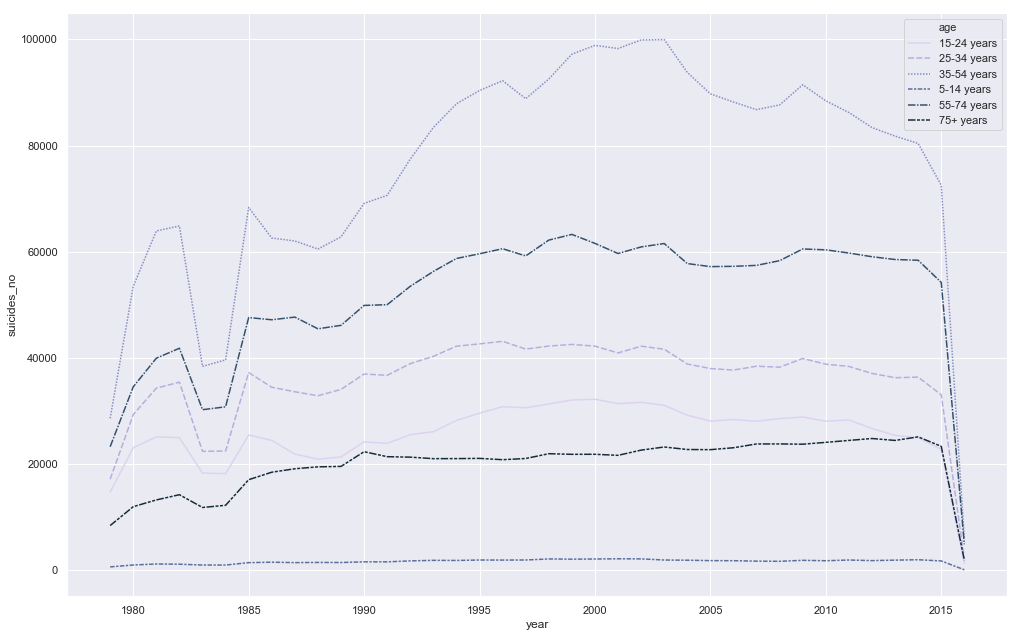

In [174]:
dx = dataset.groupby(['year','age']).agg({'suicides_no':np.sum}).reset_index()
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,palette="ch:2.5,.25",sort=False)
plt.show()

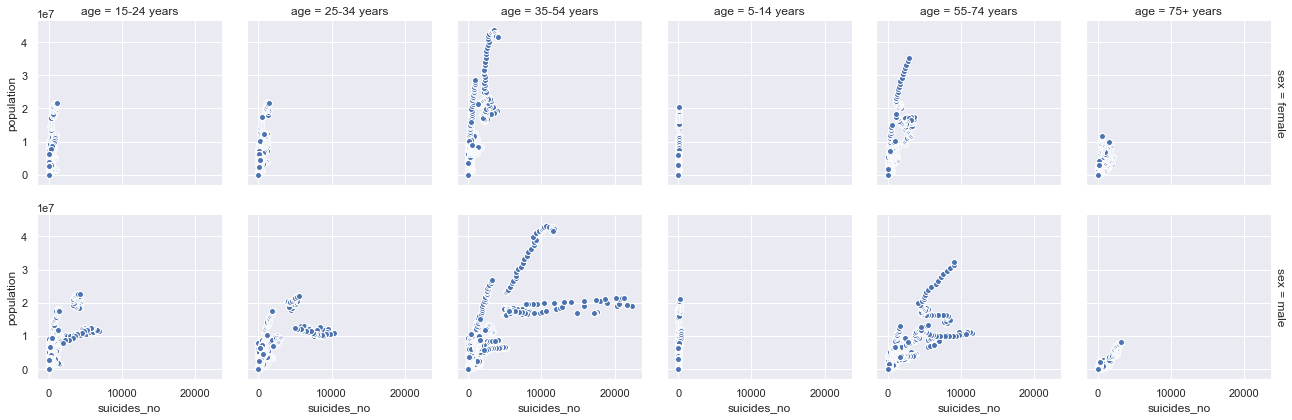

In [175]:
g = sns.FacetGrid(dataset , row = 'sex',col = 'age',margin_titles=True)
g.map(plt.scatter,"suicides_no",'population',edgecolor = 'w')
plt.show()

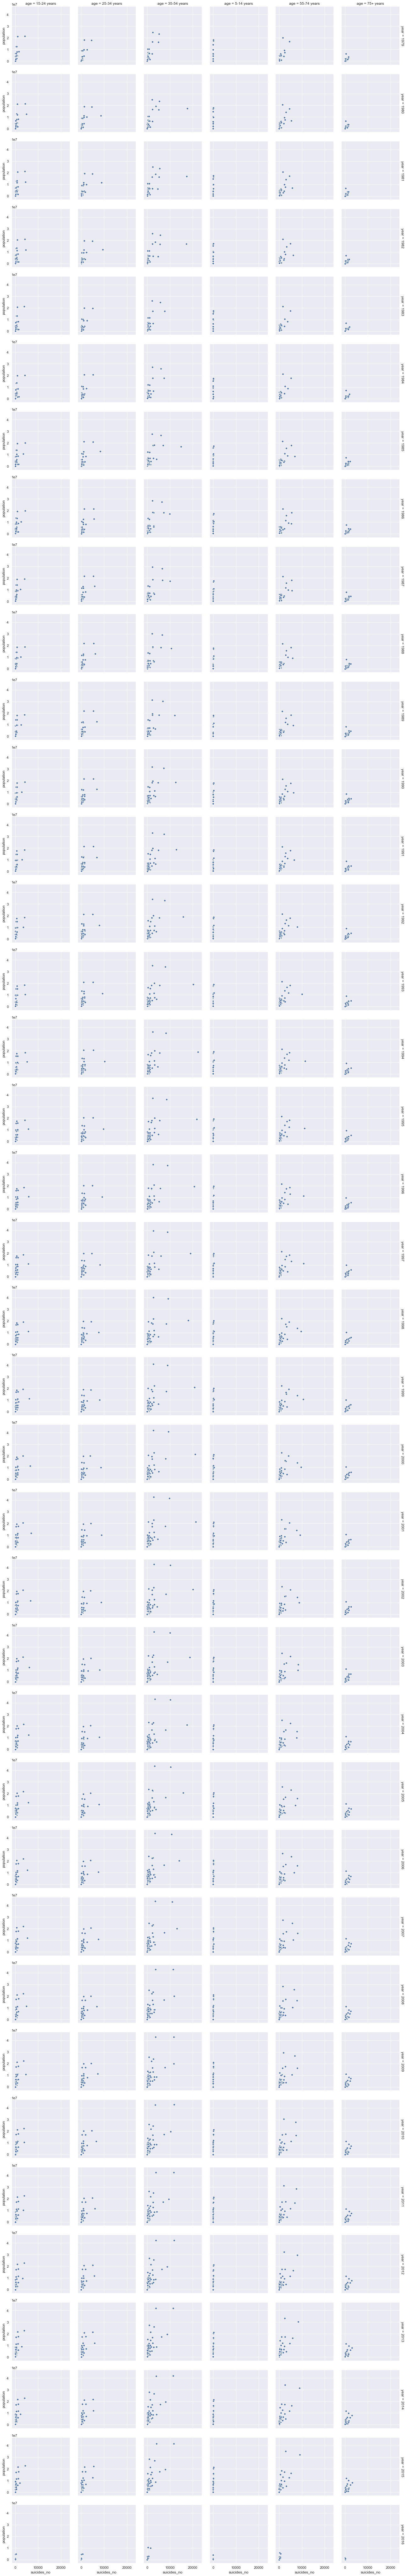

In [176]:
g = sns.FacetGrid(dataset,row = 'year',col = 'age',margin_titles= True)
g.map(plt.scatter , "suicides_no",'population',edgecolor = 'w')
plt.show()

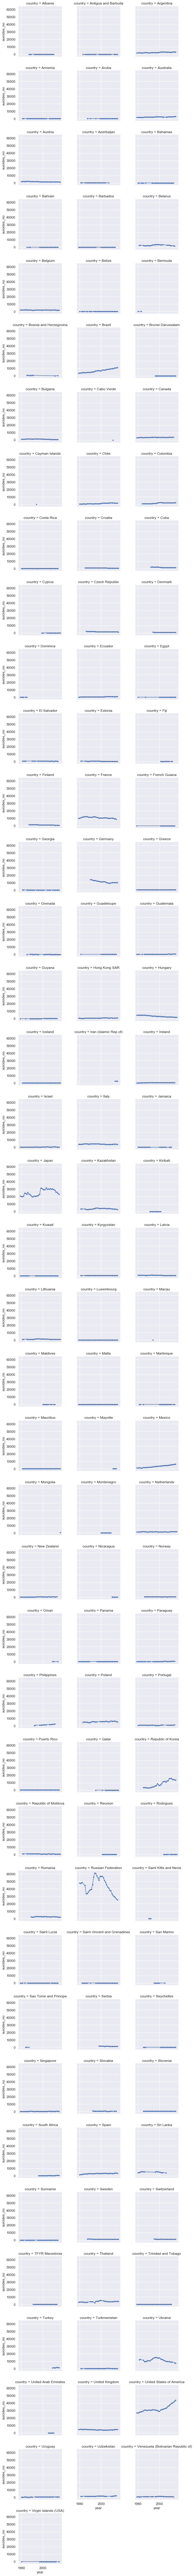

In [177]:
g = sns.FacetGrid(dataset.groupby(['country','year']).suicides_no.sum().reset_index() , col = 'country',col_wrap = 3)
g.map(plt.plot , 'year','suicides_no',marker = '.')
plt.show()

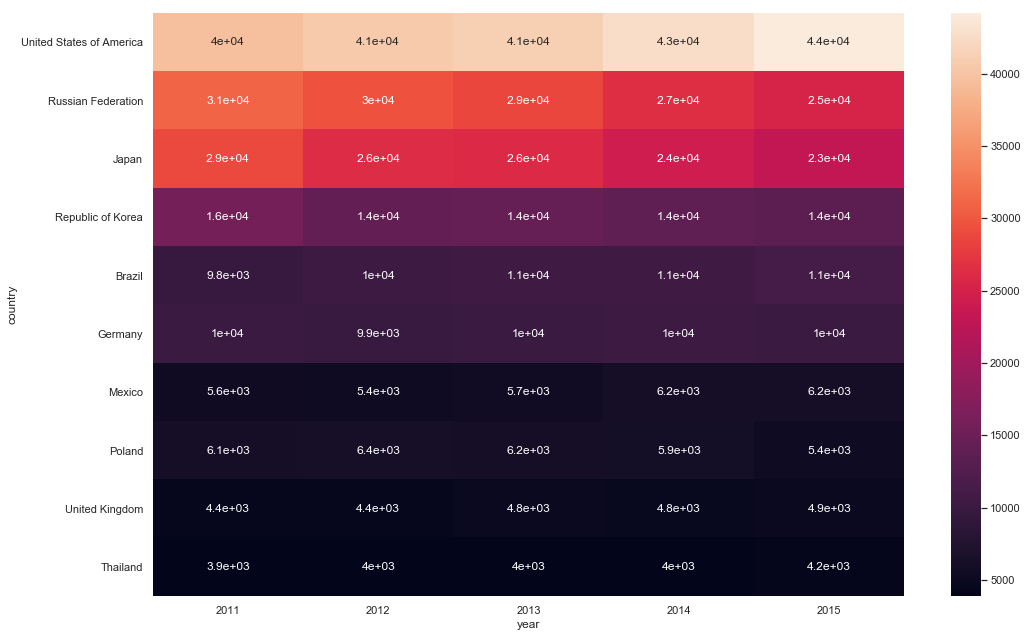

In [178]:
p = pd.crosstab(dataset.country , dataset.year , values = dataset.suicides_no , aggfunc = 'sum')
sns.heatmap(p.loc[:,2011:2015].sort_values(2015,ascending = False).dropna().head(10),annot = True)
plt.show()

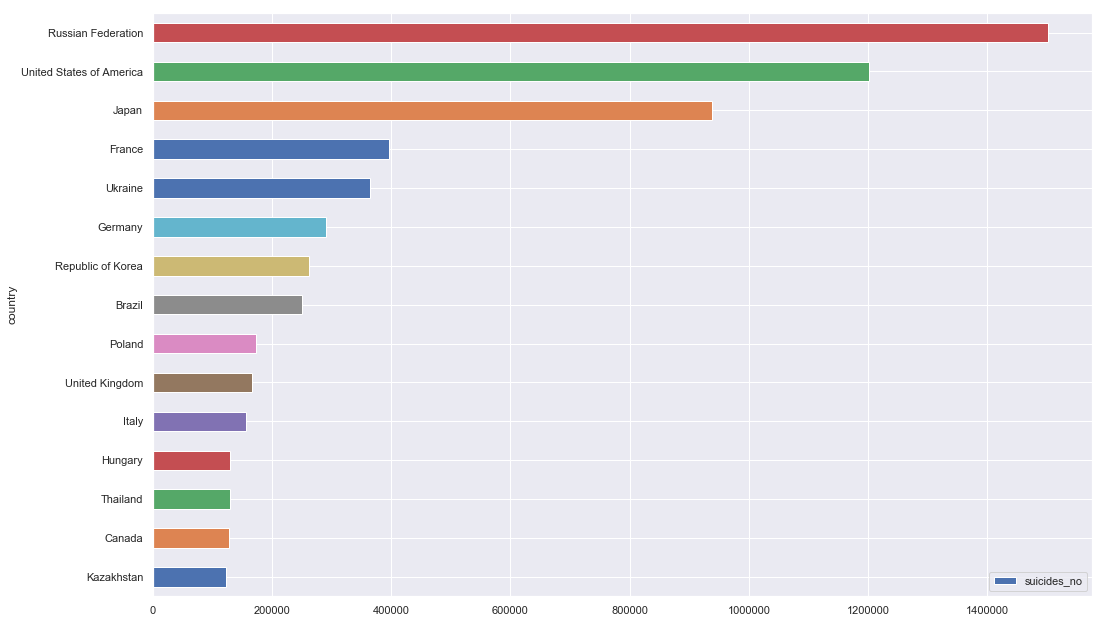

In [179]:
dataset.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no',ascending = True).tail(15).plot(x = 'country', y = 'suicides_no',kind = 'barh')

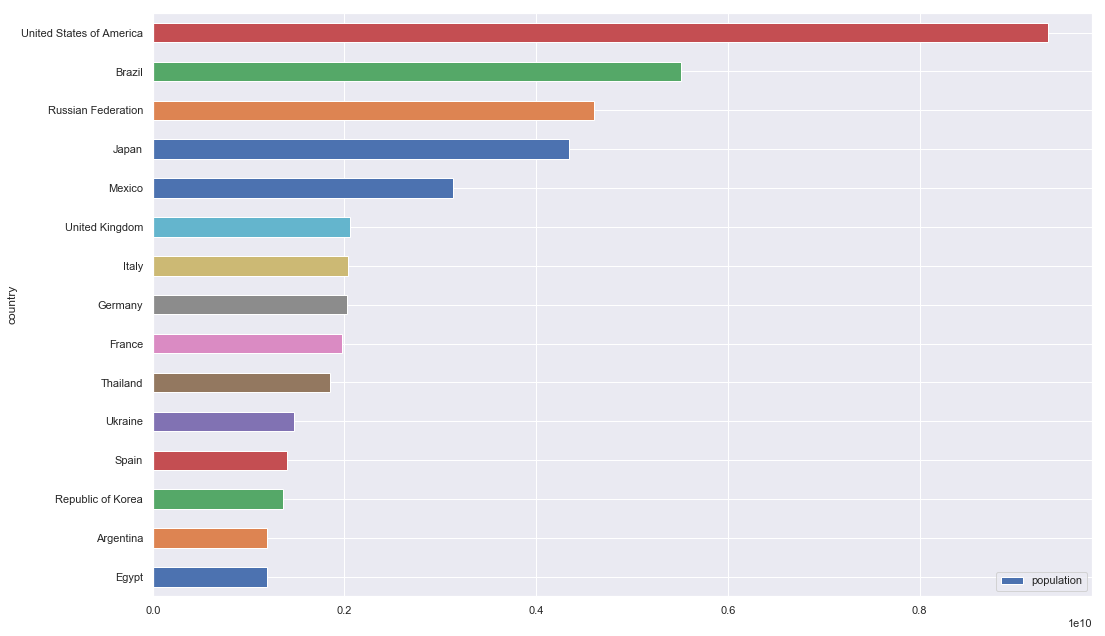

In [180]:
dataset.groupby('country')['population'].sum().reset_index().sort_values('population').tail(15).plot(kind = 'barh',y = 'population',x = 'country')

In [ ]:
sns.jointplot(dataset.suicides_no , dataset.population , kind = 'kde').annotate(stats.pearsonr)
plt.show()